# **Simple Linear Regression - Placement data**

In [82]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [44]:
url='placement.csv'
data=pd.read_csv(url,sep=',')
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [45]:
print(data.shape)
print(data.info())

(1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None


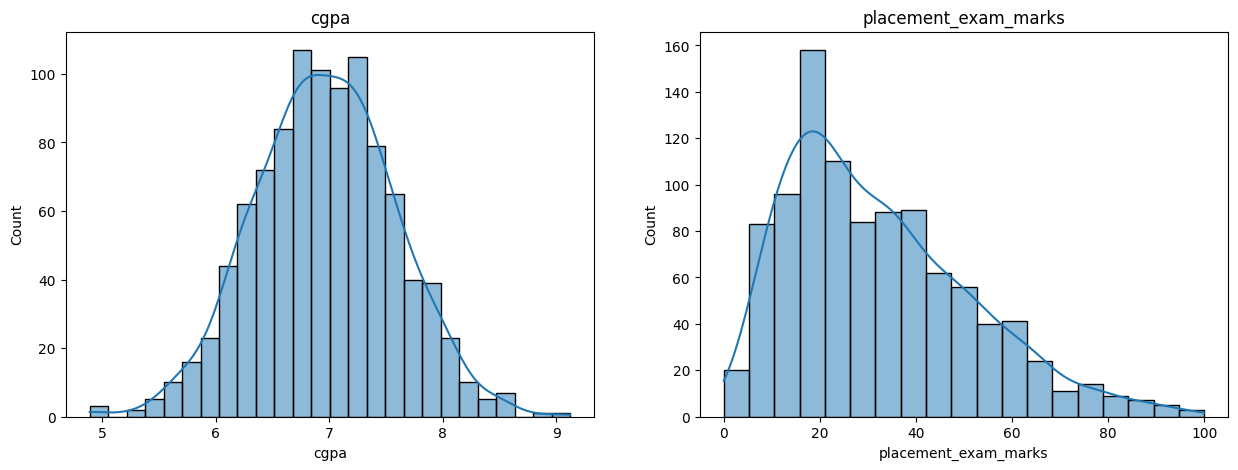

In [46]:
num=['cgpa','placement_exam_marks']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i,col in enumerate(num):
    sns.histplot(data[col],kde=True,ax=axes[i])
    axes[i].set_title(col,fontsize=12)
plt.show()

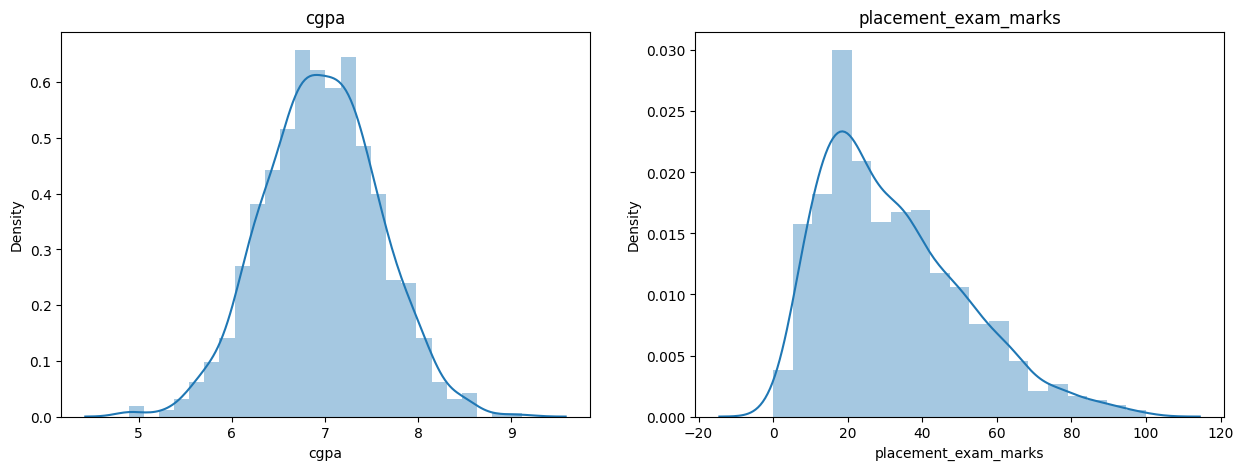

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i,col in enumerate(num):
    sns.distplot(data[col],ax=axes[i])
    axes[i].set_title(col,fontsize=12)
plt.show()

# **Outlier Detection and Removal using IQR Method**

In [48]:
data[num].describe()

,cgpa,placement_exam_marks
count,1000.000000,1000.000000
mean,6.961240,32.225000
std,0.615898,19.130822
min,4.890000,0.000000
25%,6.550000,17.000000
50%,6.960000,28.000000
75%,7.370000,44.000000
max,9.120000,100.000000


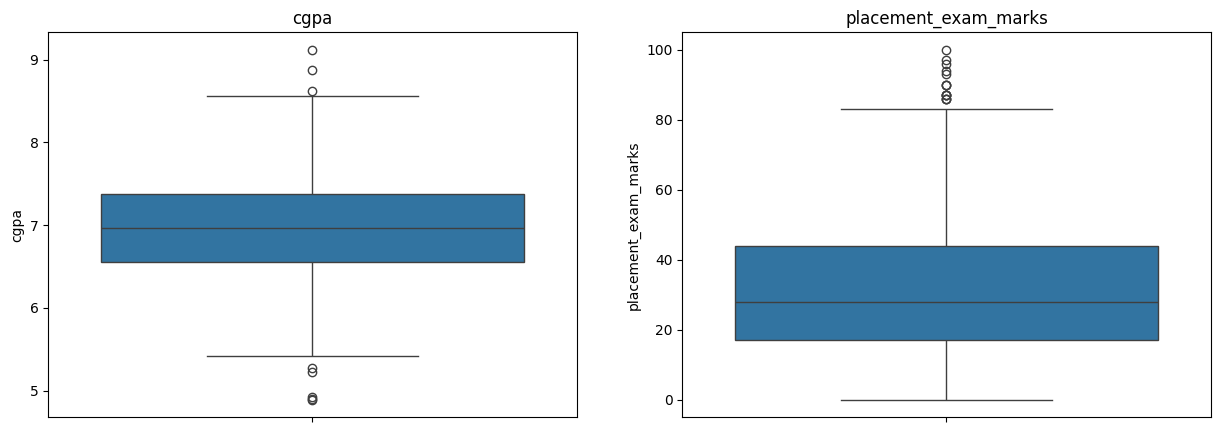

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i,col in enumerate(num):
    sns.boxplot(data=data[col],ax=axes[i])
    axes[i].set_title(col,fontsize=12)
plt.show()

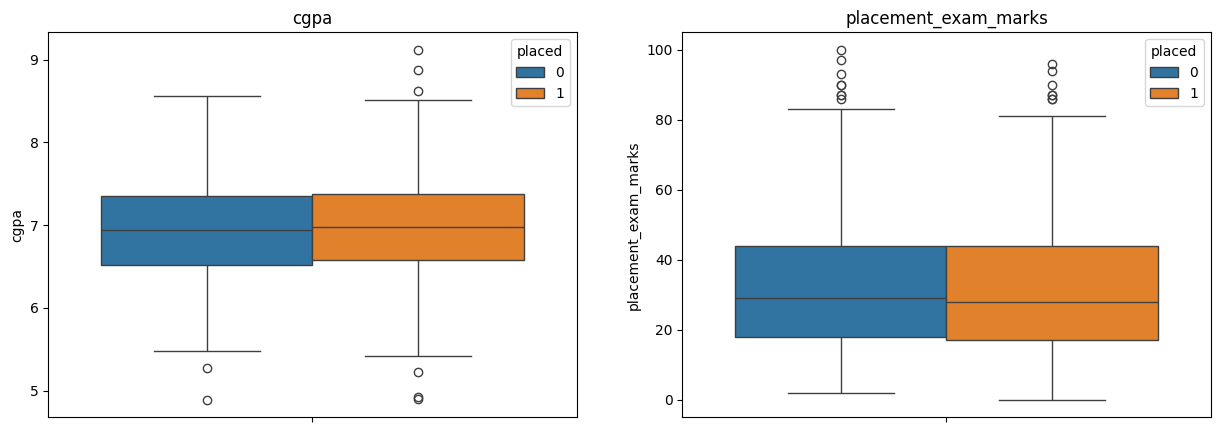

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i,col in enumerate(num):
    sns.boxplot(data=data,y=col,hue='placed',ax=axes[i])
    axes[i].set_title(col,fontsize=12)
plt.show()

In [53]:
# Calcular los percentiles y el rango intercuartílico (IQR)
percentile25 = data['placement_exam_marks'].quantile(0.25)
percentile75 = data['placement_exam_marks'].quantile(0.75)
iqr = percentile75 - percentile25

# Calcular los límites superior e inferior según la regla de Tukey
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)
# Filtrar los valores atípicos
outliers = data[(data['placement_exam_marks'] > upper_limit) | (data['placement_exam_marks'] < lower_limit)]

# Eliminar los valores atípicos del DataFrame original
clean_data = data[(data['placement_exam_marks'] <= upper_limit) & (data['placement_exam_marks'] >= lower_limit)]

84.5
-23.5


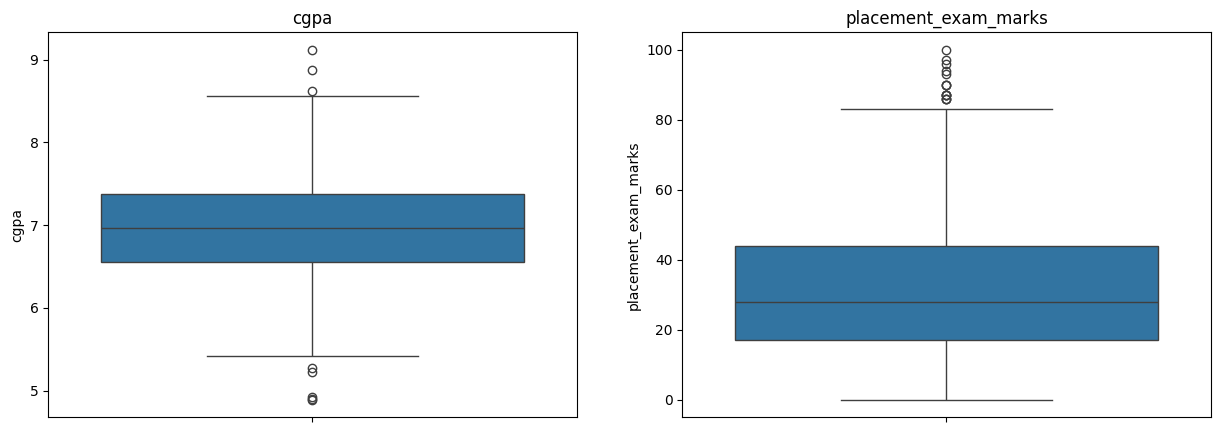

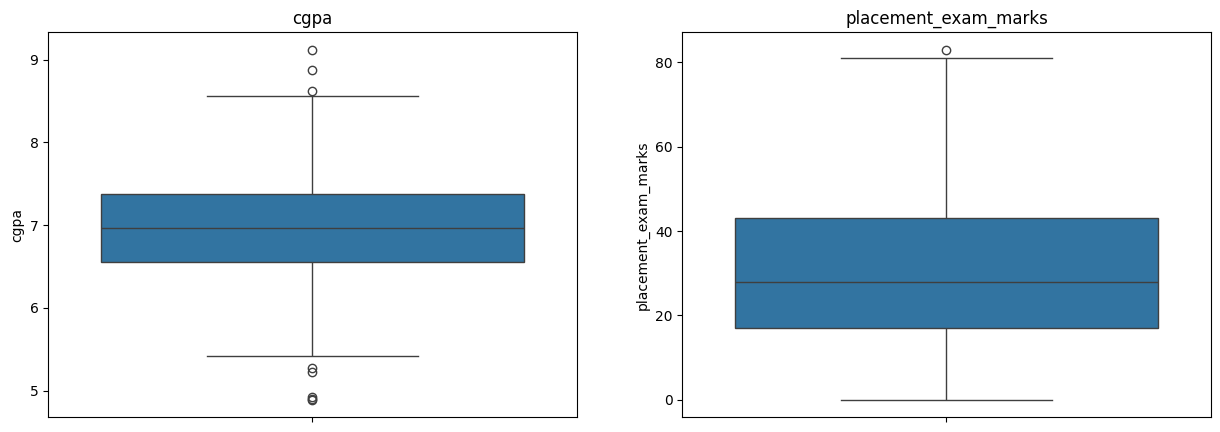

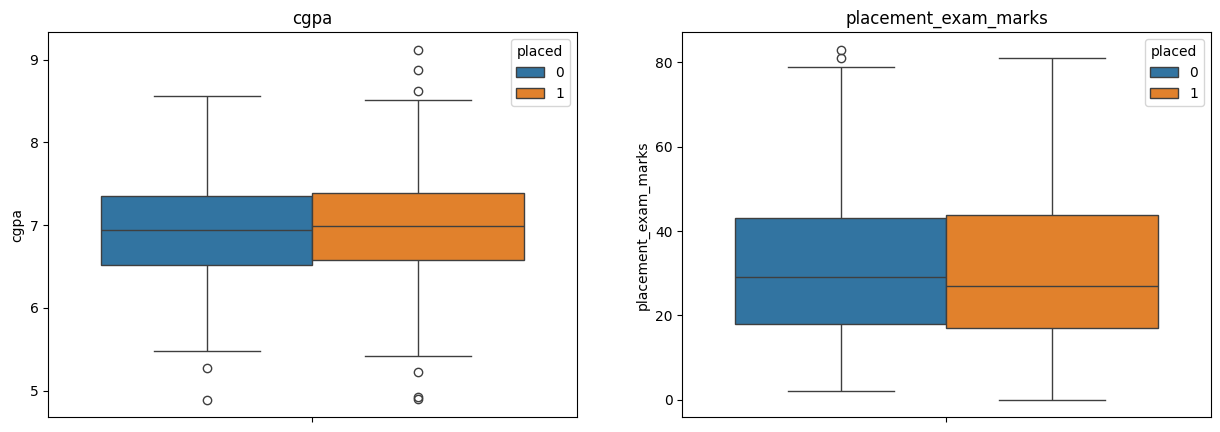

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i,col in enumerate(num):
    sns.boxplot(data=data[col],ax=axes[i])
    axes[i].set_title(col,fontsize=12)
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i,col in enumerate(num):
    sns.boxplot(data=clean_data[col],ax=axes[i])
    axes[i].set_title(col,fontsize=12)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i,col in enumerate(num):
    sns.boxplot(data=clean_data,y=col,hue='placed',ax=axes[i])
    axes[i].set_title(col,fontsize=12)
plt.show()

In [96]:
clean_data.head()
X=clean_data[['cgpa','placement_exam_marks']]
y=clean_data['placed']
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definir los parámetros que queremos probar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'class_weight':['balanced',None],
    'solver':['lbfgs', 'liblinear'],
    'max_iter':[10,50,100]
}
# Crear un modelo de regresión logística
model = LogisticRegression()
# Configurar la búsqueda en la cuadrícula con validación cruzada de 5 pliegues
grid_search = GridSearchCV(model, param_grid, cv=5)
# Ejecutar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'C': 0.1, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [98]:
# Hacer predicciones en los datos de prueba utilizando el mejor modelo
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
# Calcular la precisión del modelo
accuracy = np.mean(predictions == y_test)
print("Precisión del modelo con los mejores hiperparámetros:", accuracy)

Precisión del modelo con los mejores hiperparámetros: 0.5076142131979695
